In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


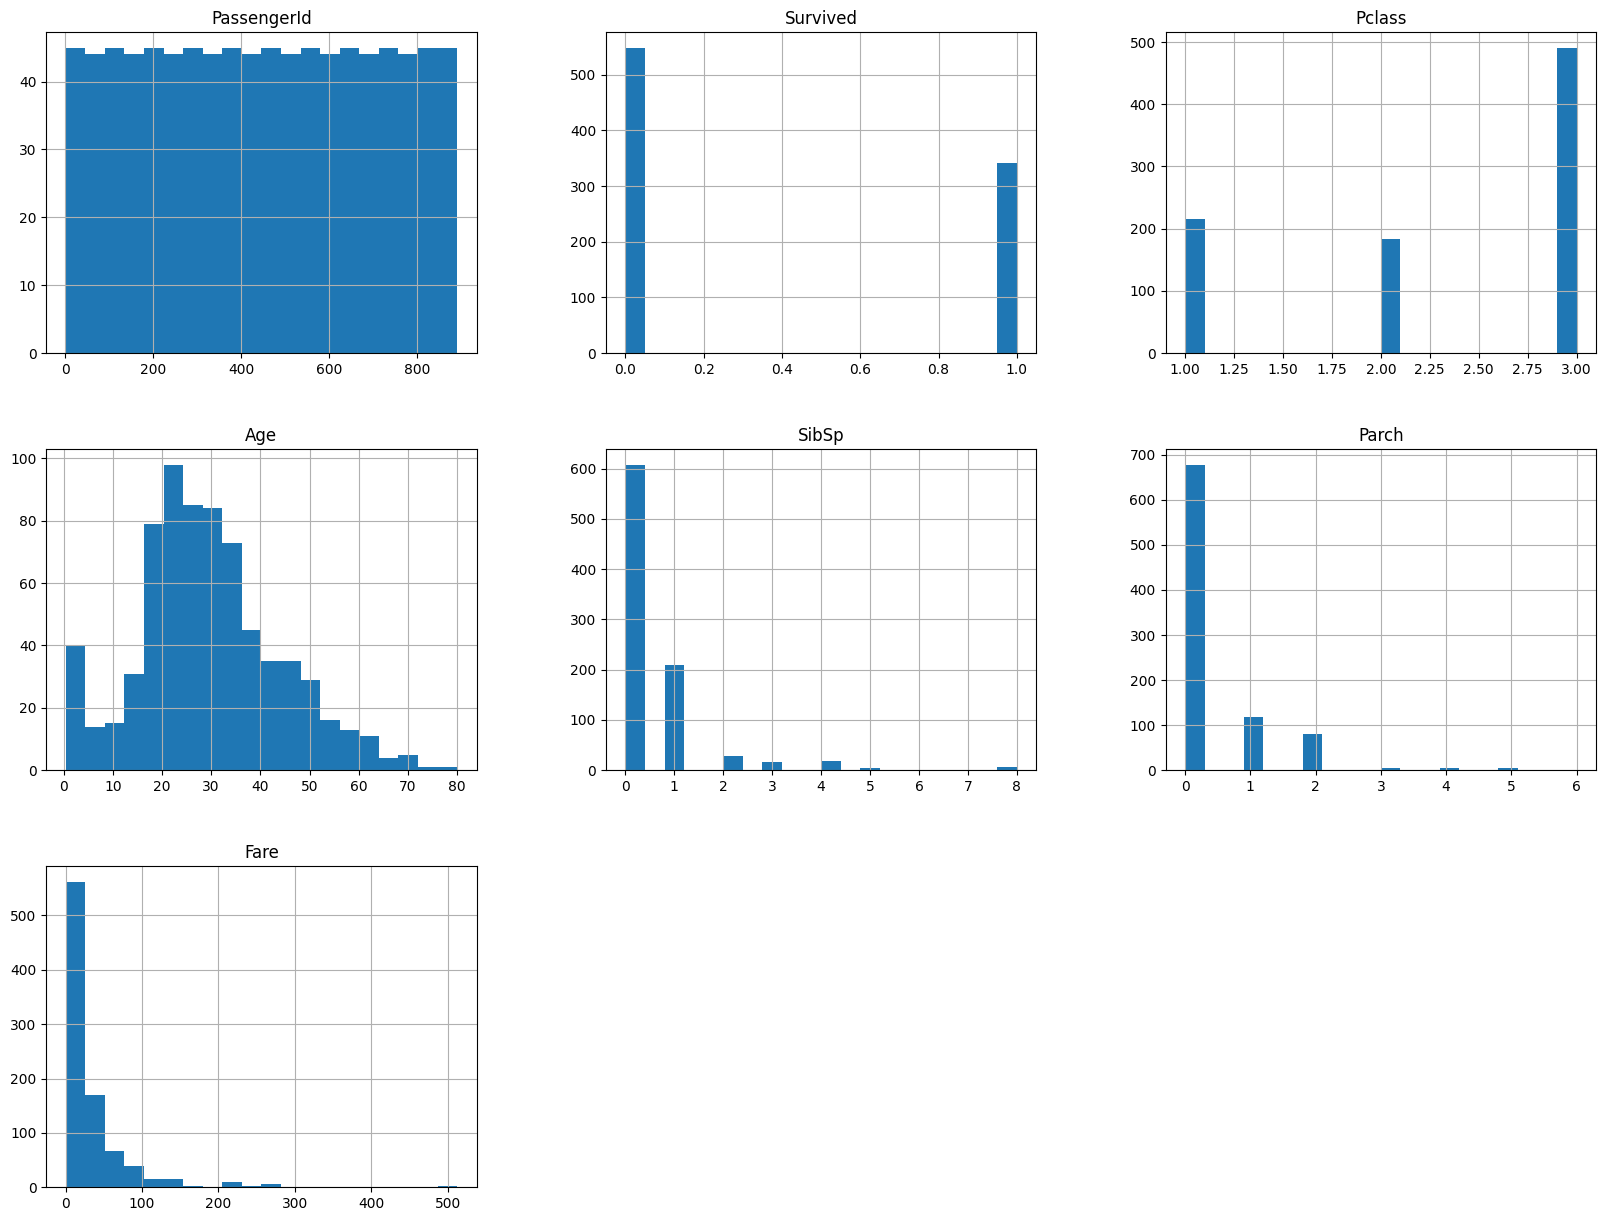

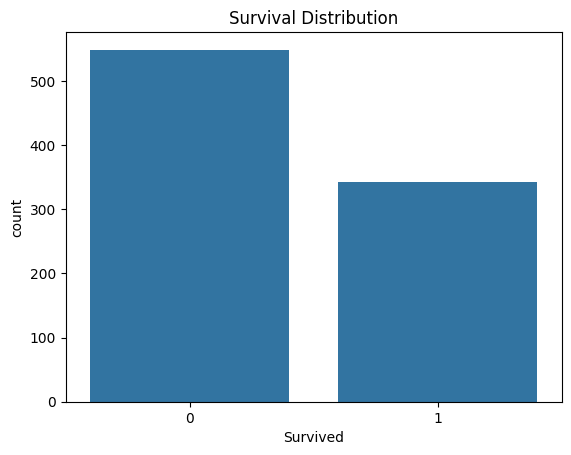

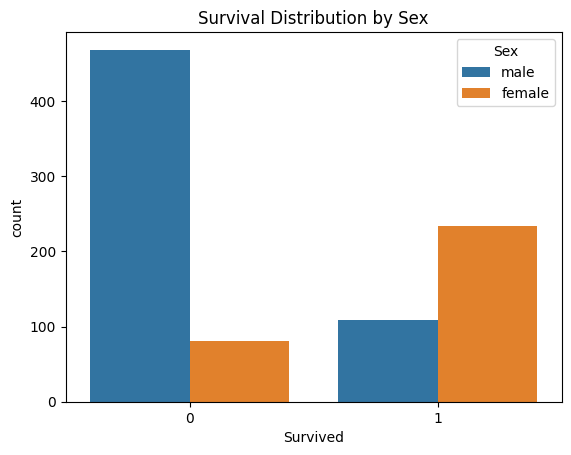

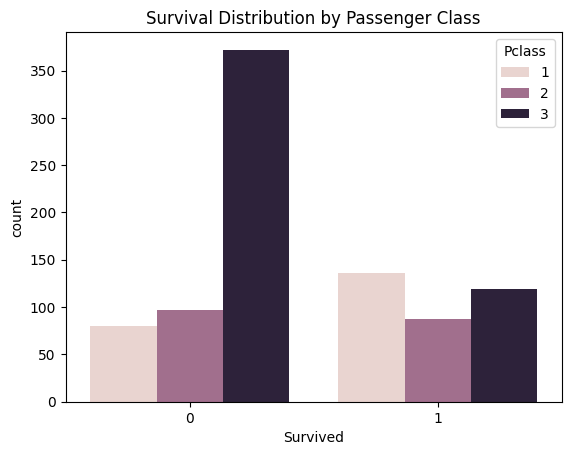

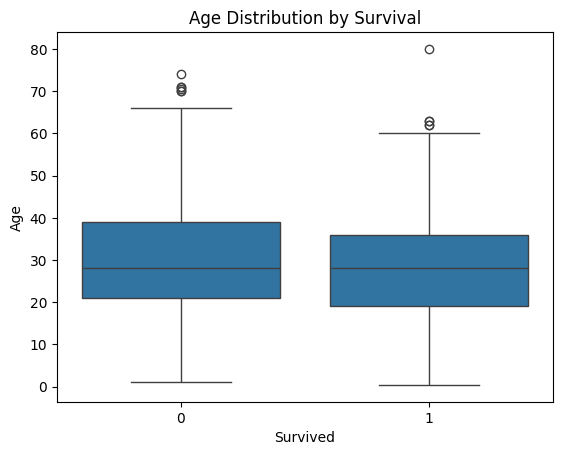

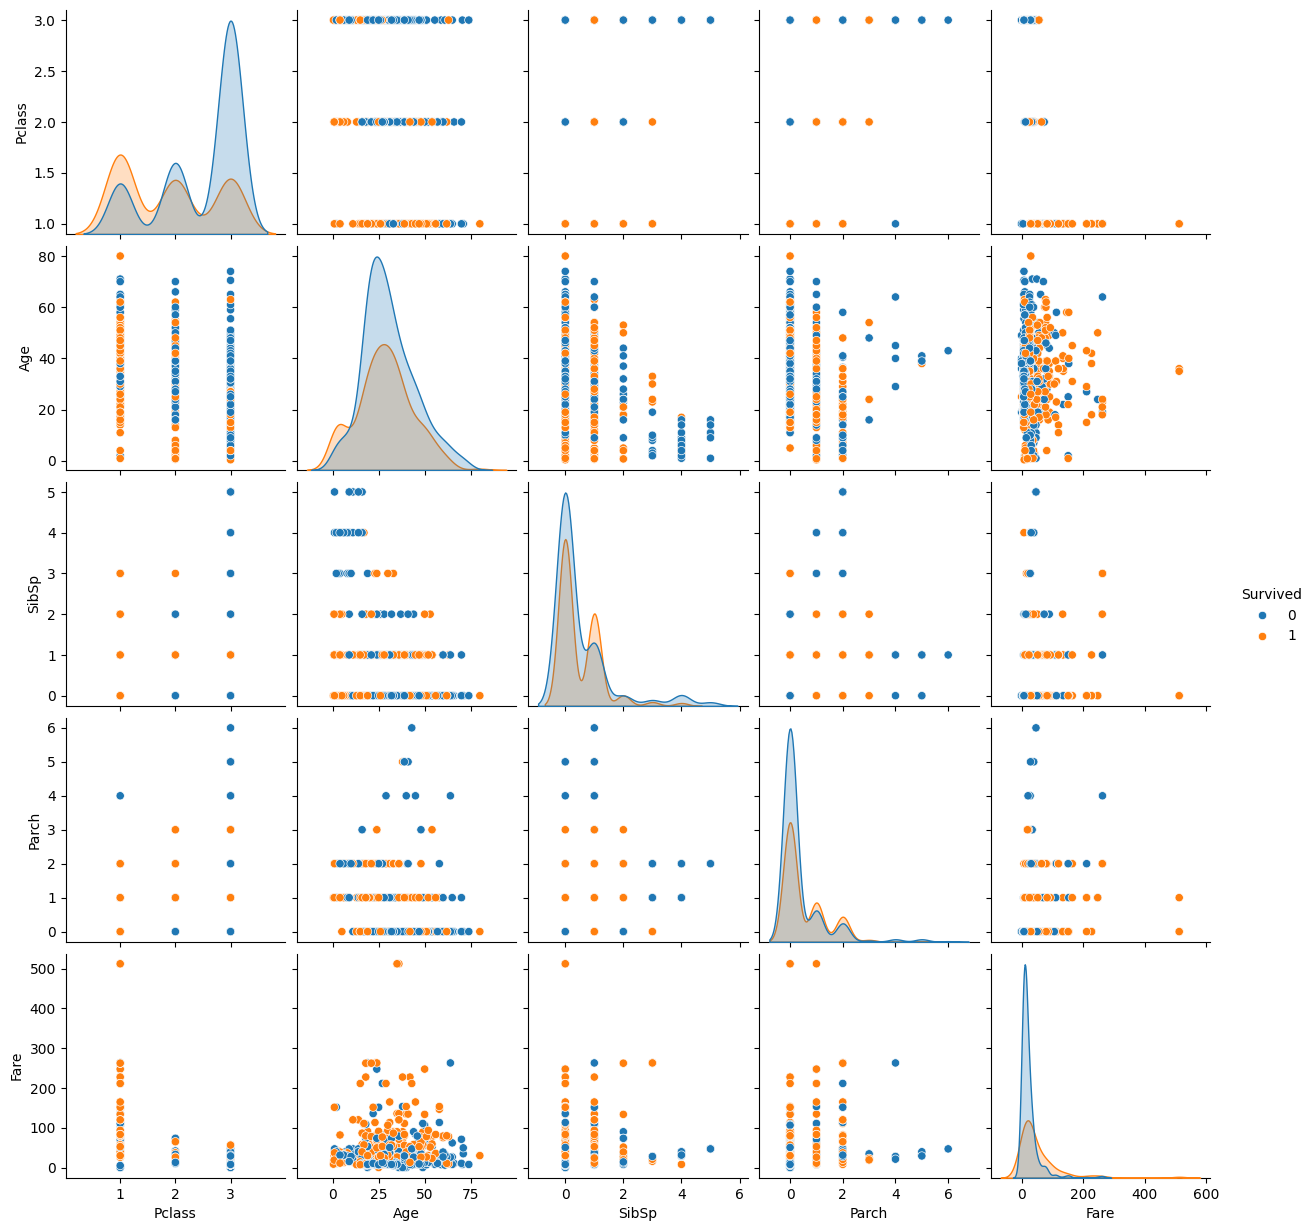

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Display the first few rows of the dataset
# print(df.head())

# # Check for missing values in each column
# print("\nMissing Values in Dataset:")
# print(df.isnull().sum())

# Distribution of numeric features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Survived distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Check survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Distribution by Sex')
plt.show()

# Check survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.show()

# Boxplot of age distribution
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna(), hue='Survived')
plt.show()

In [10]:
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create a new feature 'HasCabin' where 1 indicates the presence of a Cabin and 0 indicates absence
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


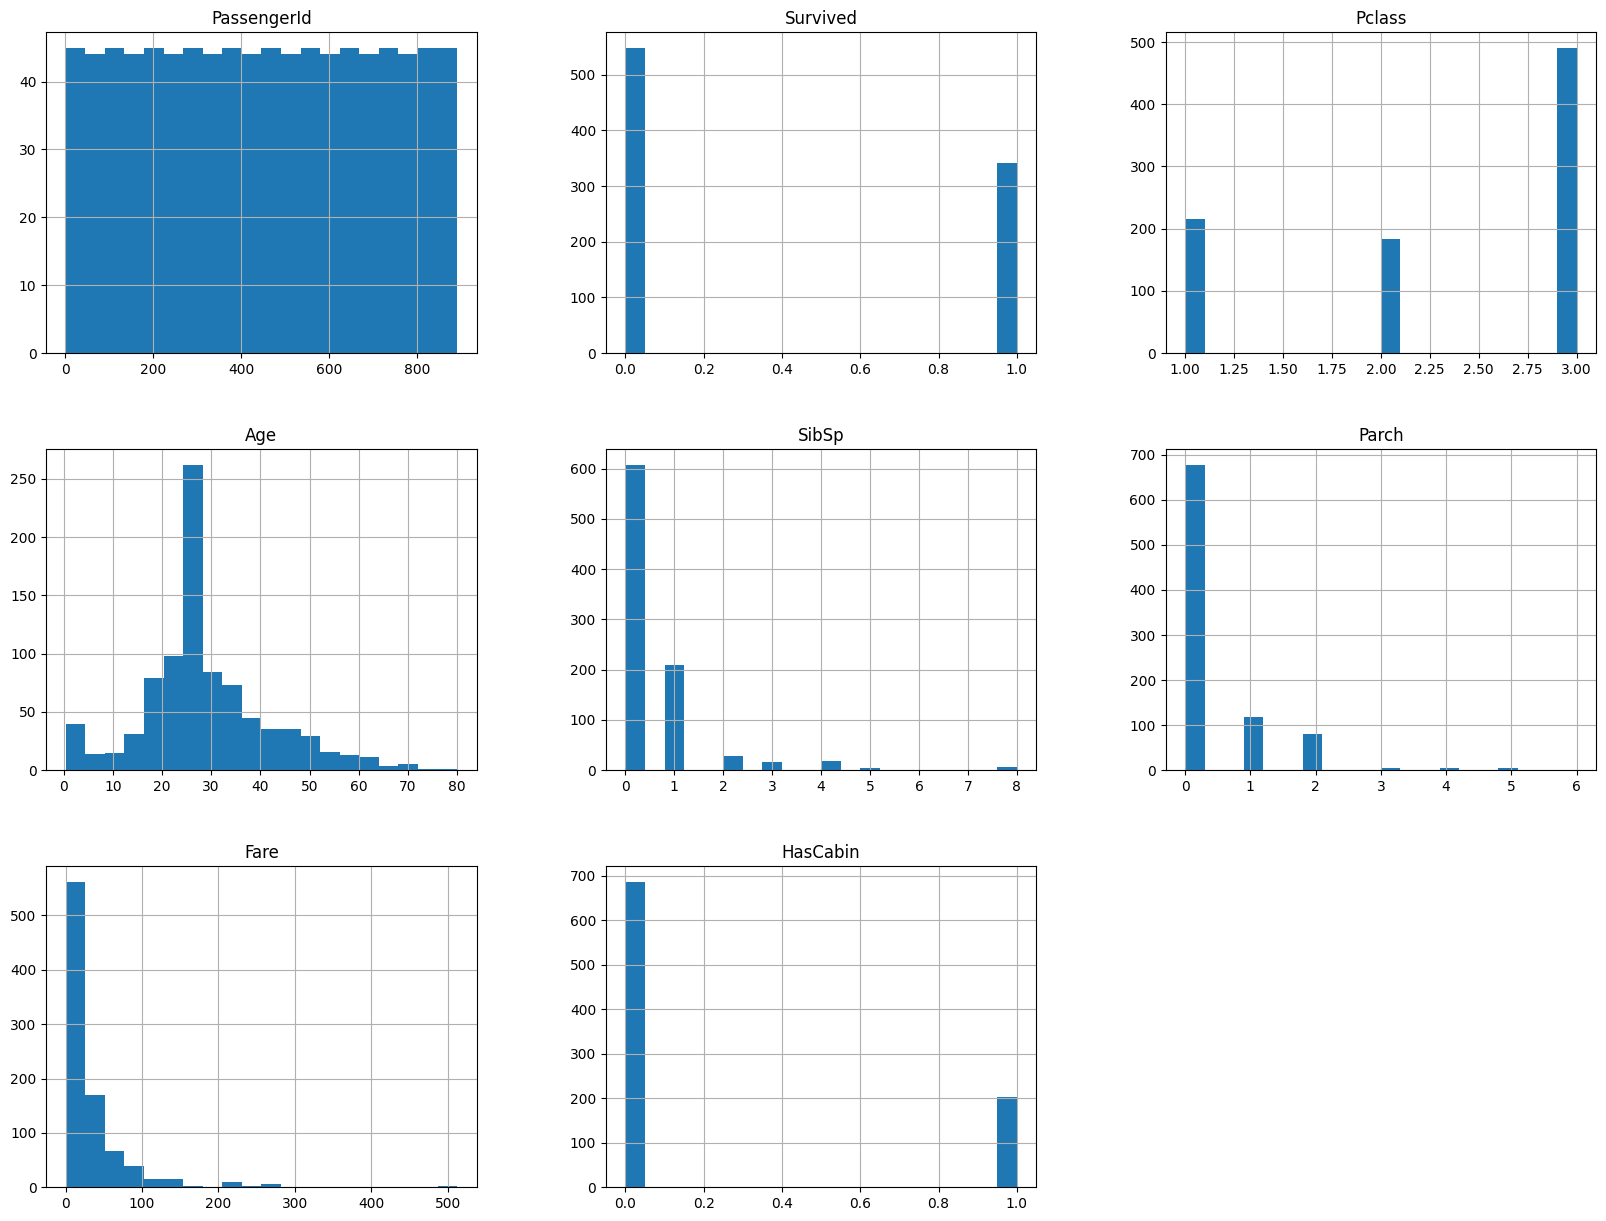

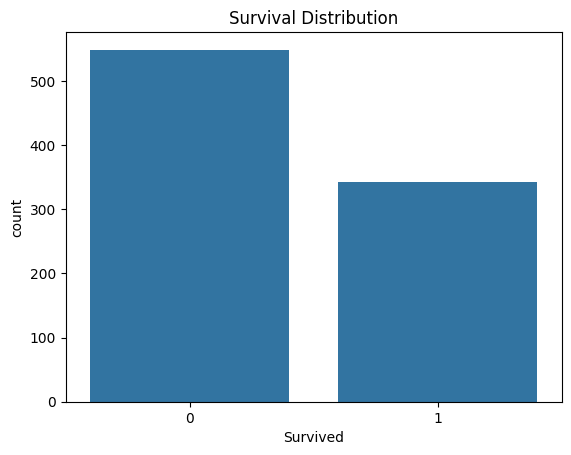

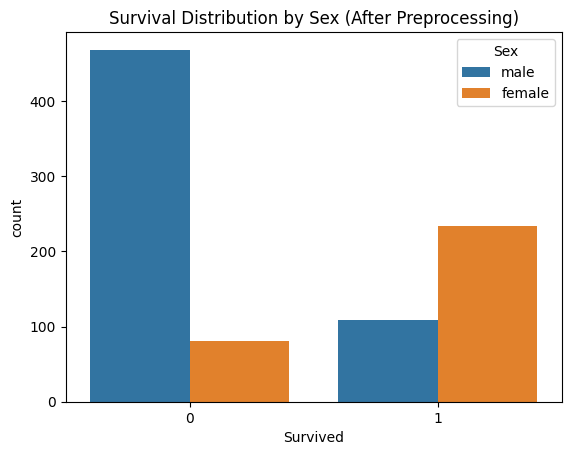

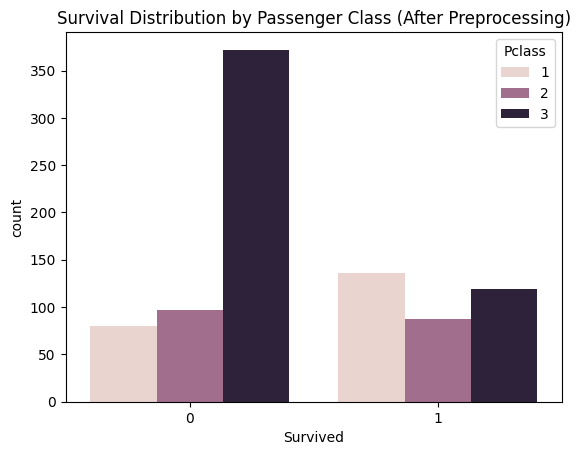

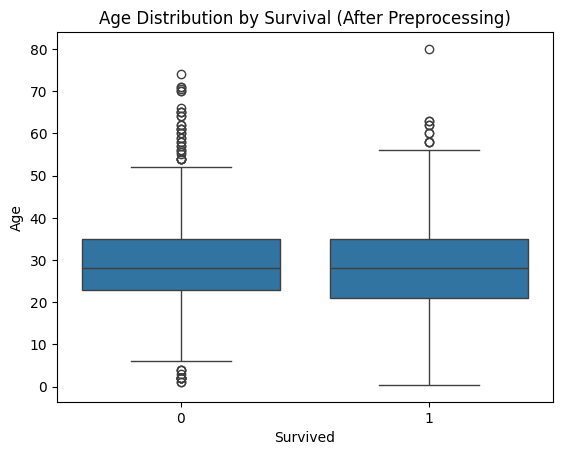

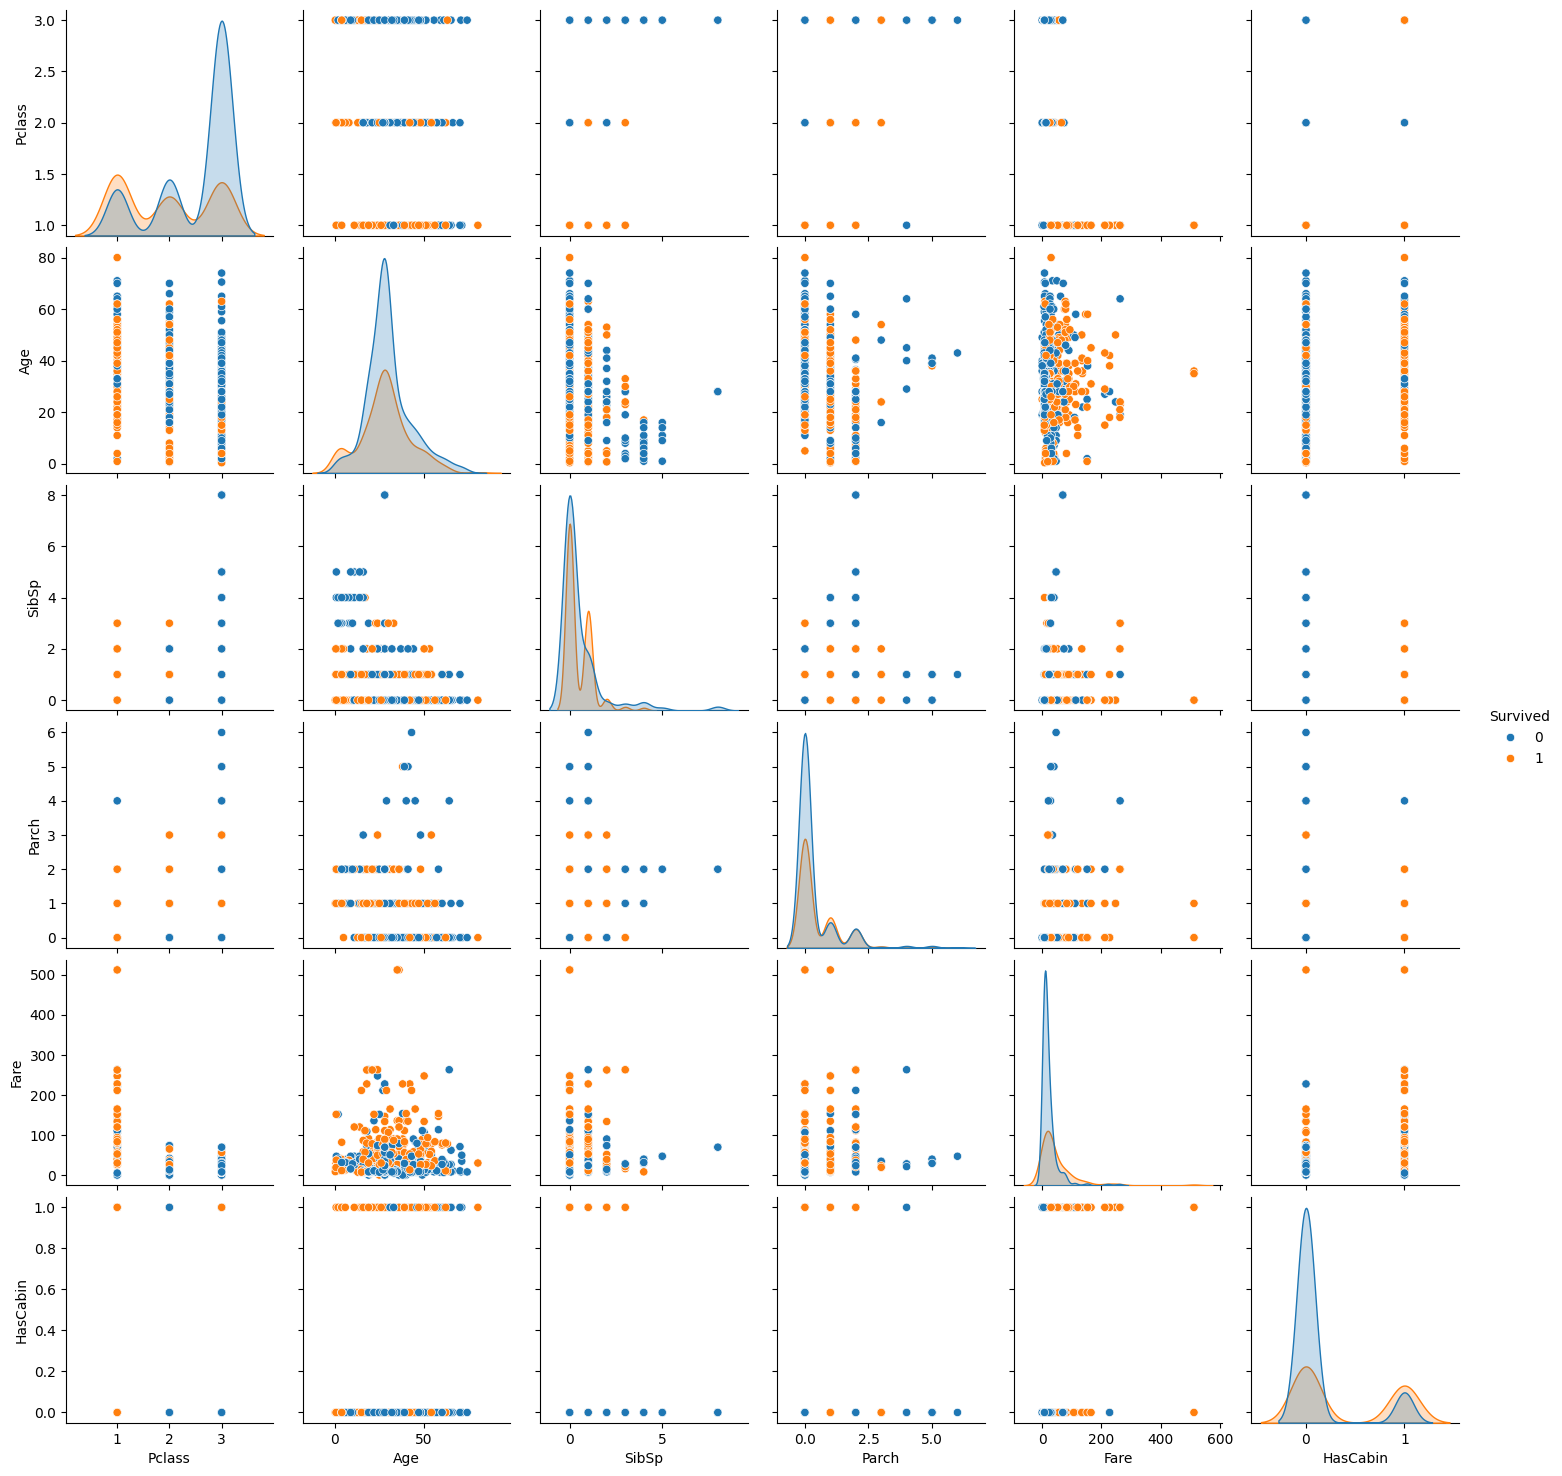

In [12]:
# # EDA after preprocessing
# print("\nAfter Preprocessing:")

# # Display the first few rows of the updated dataset
# print(df.head())

# # Check for missing values in each column after preprocessing
# print("\nMissing Values after Preprocessing:")
# print(df.isnull().sum())

# Distribution of numeric features after preprocessing
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Survived distribution after preprocessing
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Check survival rate by sex after preprocessing
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Distribution by Sex (After Preprocessing)')
plt.show()

# Check survival rate by passenger class after preprocessing
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Distribution by Passenger Class (After Preprocessing)')
plt.show()

# Boxplot of age distribution after preprocessing
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival (After Preprocessing)')
plt.show()

# Pairplot for numerical variables after preprocessing
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin']].dropna(), hue='Survived')
plt.show()


In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [30]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,1


In [33]:
x = df[['Age','PassengerId', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
xtrain.shape

(712, 9)

In [47]:
xtest.shape

(179, 9)

In [48]:
log=LogisticRegression()

In [49]:
log.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
ypredlog=log.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Directly call accuracy_score since you imported it
accuracylog = accuracy_score(ytest, ypredlog)
accuracylog

0.7932960893854749

In [52]:
confusion_matrix(ypredlog,ytest)

array([[94, 21],
       [16, 48]])

In [55]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear']   # Suitable for small datasets
}

# Initialize Logistic Regression
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(xtrain, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_logreg = grid_search.best_estimator_

# Make predictions
ypred_best = best_logreg.predict(xtest)

# Evaluate the model
accuracy_best = accuracy_score(ytest, ypred_best)
print("Tuned Logistic Regression Accuracy:", accuracy_best)
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_best))
print("Classification Report:\n", classification_report(ytest, ypred_best))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.7877094972067039
Confusion Matrix:
 [[93 17]
 [21 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [56]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

In [58]:
x = df[['Age', 'PassengerId', 'Pclass', 'Sex', 'FamilySize', 'Fare', 'Embarked']]
y = df['Survived']

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [65]:
log.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
ypredlog = log.predict(xtest)

In [67]:
# Evaluate the improved model
accuracylog = accuracy_score(ytest, ypredlog)
accuracylog

0.8156424581005587

In [68]:
confusion_matrix(ypredlog,ytest)

array([[95, 18],
       [15, 51]])